# 회귀

In [1]:
# p.308

회귀: 수치형

회귀의 종류
1. 단순회귀
2. 다중회귀
3. 로지스틱회귀
4. 다항회귀
5. 라쏘,릿지

## 비용최소화하기-경사하강법

NameError: name 'model' is not defined

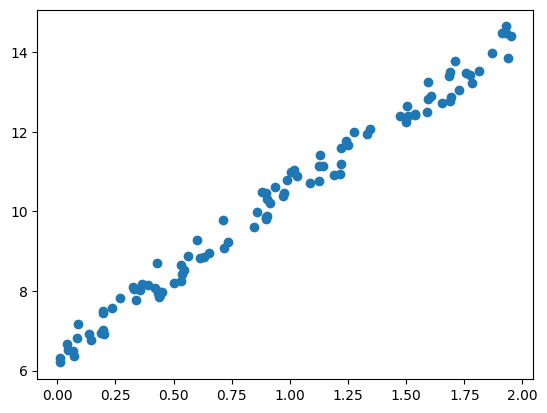

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

x=2*np.random.rand(100)
y= 6+4*x +np.random.rand(100)
plt.scatter(x,y)
#X.shape #X는 2차원
#x=2*np.random.rand(100) #x는 1차원

import pandas as pd

model = 
lr = model.fit(x.reshape(-1, 1), y)   #방법1
#방법2 lr = model.fit(pd.DataFrame(x), y) 
#방법3 lr=model.fit(np.array(x).reshape(-1, 1),y)   
lr.coef_
lr.intercept_

#오류 고치기
#lr = model.fit(x, y) 를 방법1,2,3으로고침 

In [65]:
lr = model.fit(x.reshape(-1, 1), y)

ValueError: Found input variables with inconsistent numbers of samples: [100, 30]

In [7]:
#오류 고치기
#lr = model.fit(x, y) 를 방법1,2,3으로고침 
#방법1lr = model.fit(x.reshape(-1, 1), y)   
#방법2 lr = model.fit(pd.DataFrame(x), y) 
#방법3 lr=model.fit(np.array(x).reshape(-1, 1),y)   


#연습한거임
#x.reshape(-1,1).shape
#x.reshape(-1,1)
#x[:, np.newaxis].shape   #newaxis는 한개의 행을 만들어라
#x[np.newaxis]

# p. 321
- fit_intercept: 불린 값으로, 디폴트는 True이다. intercept(절편) 값을 계산할 것인지 말지를 지정한다. 만일 False로 지정하면 intercept(절편)가 사용되지 않고 0으로 지정됨
- normalize: 불린 값으로 디폴트는 False이다. fit_intercept가 False인 경우에는 이 파라미터가 무시됩니다. 만일 True이면 회귀를 수행하기 전에 입력데이터 세트를 규정화한다
- coef_ : fit() 매서드를 수행했을 때 회귀 계수가 배열 형채로 저장하는 속성. Shape는 (Target 값 개수, 피처 개수)
- itercept_ :itercept 값

Ordinary Least Square 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다.
피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감 = 다중공산성(multi-collinerity)문제

- 회귀평가지표: 실제 값과 회귀 예측값의 파이 값을 기반으로 한 지표가 중심이다.
- MAE: 오차를 절대값으로 변환해 평균한 것
- MSE: 오차를 제곱해 평균한 것
- RMSE: 오차를 제곱해 평균한 것에 루트를 씌운 것


## 사이킷런 LinearRegreeion을 이용한 보스턴 주택가격 예측

In [8]:
from sklearn.linear_model import LinearRegression
model= LinearRegression(fit_intercept=True)

lr=model.fit(X,y)
lr.coef_
lr.intercept_

NameError: name 'X' is not defined

In [9]:
X

NameError: name 'X' is not defined

## 다중회귀

In [10]:
## LinearRegression을 이용해 보스턴 주택가격 회귀 구현

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [11]:
# boston 데이터 세트 로드
boston=load_boston()

# boston 데이터세트 DataFrame으로 변환
bostonDF= pd.DataFrame(boston.data, columns= boston.feature_names)

# boston 데이터세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가
bostonDF['PRICE']=boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


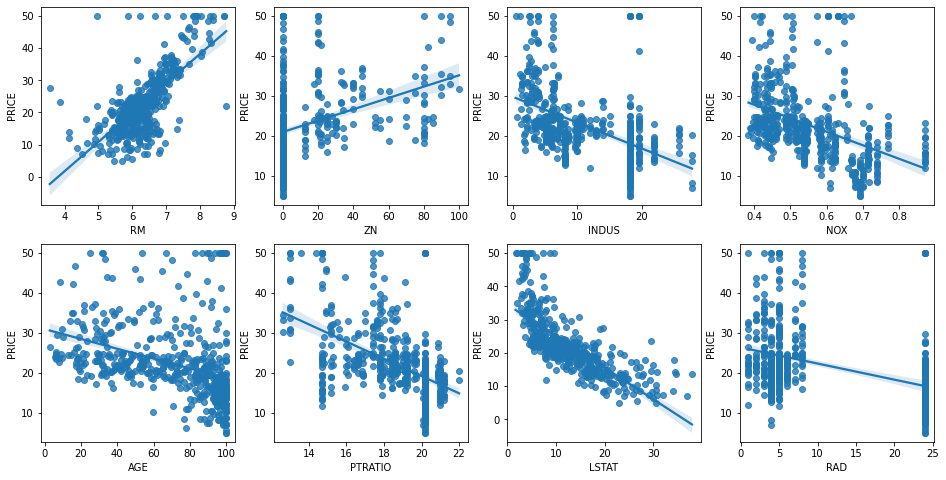

In [12]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4X2개의 ax를 가짐

fig, axs= plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features= ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # 시본의 replot을 이용해 산점도와 선형 회귀 직선을 함께 표시
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
y_target= bostonDF['PRICE']
X_data= bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr=LinearRegression()
lr.fit(X_train, y_train)

y_preds= lr.predict(X_test)
mse= mean_squared_error(y_test, y_preds)   #mse: 평균제곱의오차
rmse= np.sqrt(mse)                         #rmse: 평균제곱의오차에 루트

print('MSE: {0:.3f}, RMSE: {1:.3F}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [15]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [16]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_,1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MES를 구한 뒤 이를 기반으로 다시 RMES 구함
neg_mse_scores= cross_val_score(lr, X_data, y_target, scoring= "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse =np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores,2))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE: 5.829


In [18]:
# p.330

#1차, 2차

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# dgree=2인 2차 다항식으로 변환하기 위해 PolynomialFeature를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr= poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [19]:
# 3차

def polynomial_func(X):
    y=1 +2 * X[:,0] +3 * X[:,0]**2 +4 * X[:,1]**3
    return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y=polynomial_func(X)
print('삼차 다항식 계수 feature:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 계수 feature:
 [  5 125]


In [20]:
# 3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model= LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


## 다항회귀

In [21]:
# p.332
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

In [22]:
def polynomial_func(X):
    y=1+2*X[:,0]+ 3*X[:,0]**2 +4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear REgression을 연결
model=Pipeline([('poly', PolynomialFeatures(degree=3)), 
                ('liner', LinearRegression())])
X= np.arange(4).reshape(2,2)
y= polynomial_func(X)

model= model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['liner'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항회귀를 이용한 과소적합 및 과적합 이해

In [23]:
np.random.seed(0)
n_samples=30
X= np.sort(np.random.rand(n_samples))
y=np.random.rand(n_samples)*0.1

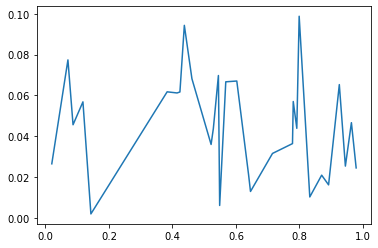

In [24]:
plt.plot(X,y)

# 편향- 분산 트레이드오프(Bias- Variance Trade off)
- 매우 단순화, 한방향성으로 치우친 모델: 고 편향
- 매우 복잡화, 높은 변동성을 가진 모델: 고 분산

### 릿지회귀

In [25]:
# p.399
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores=np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 fold 의 개별 Negative MSE scores:', np.round(neg_mse_scores,3))
print('5 fold 의 개별 RMSE scores:', np.round(rmse_scores,3))
print('5 fold 의 개별 RMSE : {0:.3f}'. format(avg_rmse))

5 fold 의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 fold 의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 fold 의 개별 RMSE : 5.518


In [26]:
# 릿지
ridge= Ridge(alpha=10)
scores= cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)

In [27]:
# 라쏘회귀
from sklearn.linear_model import Lasso
Lasso=Lasso(alpha=200)
scores= np.sqrt(-1*scores)
np.mean(rmse)

4.158956107955715

In [28]:
# 10.20

# 9. 자전거 대여 수요 예측

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df=pd.read_csv('C:/Users/user/머신러닝/train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [30]:
# object형은 몇개? 1개
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [31]:
# datatime이 object(문자열)에서 datatimecolumn을 datatimetype으로
# 방법1
bike_df['datetime'] = pd.to_datetime(bike_df['datetime']) 
bike_df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [32]:
# 방법2
#bike_df['datetime'] = bike_df['datetime'].astype('datetime64') 
#bike_df['datetime']

In [33]:
# 데이터타임을 연, 월, 일로 나누어보자
# 방법1
#bike_df["datetime"] = bike_df["datetime"].astype("str")
#bike_df['year'] = bike_df['datetime'].str.slice(0,4)
#bike_df['month'] = bike_df['datetime'].str.slice(5,7)
#bike_df['day'] = bike_df['datetime'].str.slice(8,10)
#bike_df['hour'] = bike_df['datetime'].str.slice(11,13)
#bike_df["datetime"] = bike_df["datetime"].astype("datetime64[ns]") 

# 방법2
#bike_df['datetime'].dt.strftime('%Y')
#bike_df['datetime'].dt.strftime('%m')
#bike_df['datetime'].dt.strftime('%d') 

# 방법3
#bike_df.set_index('datetime', inplace=True)

#index_label = pd.to_datetime(bike_df.index, format='%Y년%m월%d일%t시간')

#bike_df['year'] = bike_df.index.year
#bike_df['month'] = bike_df.index.month
#bike_df['day'] = bike_df.index.day
#bike_df['time'] = bike_df.index.time
#bike_df 

# 방법4
#bike_df['year'] = bike_df.datetime.dt.year
#bike_df['month'] = bike_df.datetime.dt.month
#bike_df['day'] = bike_df.datetime.dt.day
#bike_df['hour'] = bike_df.datetime.dt.hour 

# 방법5
#bike_df['datetime']
#bike_df['year'] = bike_df['datetime'].map(lambda x: x.strftime('%Y'))
#bike_df['month'] = bike_df['datetime'].map(lambda x: x.strftime('%m'))
#bike_df['day'] = bike_df['datetime'].map(lambda x: x.strftime('%d')) 

In [34]:
bike_df['year'] = bike_df.datetime.dt.year
bike_df['month'] = bike_df.datetime.dt.month
bike_df['day'] = bike_df.datetime.dt.day
bike_df['hour'] = bike_df.datetime.dt.hour 

In [35]:
# 'datatime', 'casual', 'registerd'를 지우기
bike_df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True) 

In [36]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


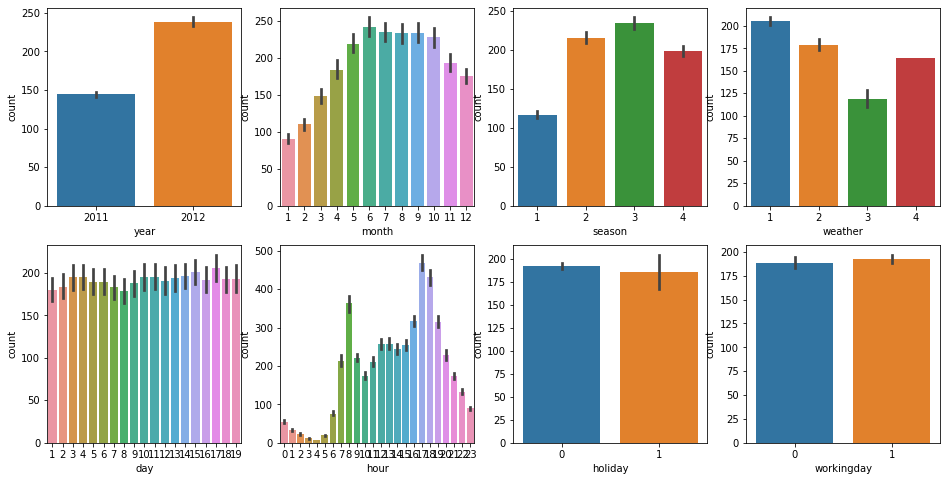

In [37]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 평균값을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col]) 

In [38]:
# MSE를 가져오기, 이름을 mse로 바꿔주기
from sklearn.metrics import mean_squared_error as mse

In [39]:
y_target = bike_df['count']
X_features =bike_df.drop('count', axis=1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
preds= lr.predict(X_test)
mse(y_test, preds)

19852.69408784142

In [43]:
y_test.describe()
# max:901,오른쪽으로 길게 나오고 왼쪽으로 몰려있다는 것을 알 수 있음

count    3266.000000
mean      194.430496
std       180.235458
min         1.000000
25%        43.000000
50%       153.000000
75%       285.750000
max       901.000000
Name: count, dtype: float64

In [44]:
# y_test와 preds를 로그변환해서 mse()에 넣기
np.log1p(y_test), np.log1p(preds)

(6638     5.501258
 7975     5.480639
 5915     5.438079
 8050     6.148468
 5894     5.817111
            ...   
 5521     1.791759
 10626    2.564949
 8126     4.317488
 1633     4.143135
 6198     5.153292
 Name: count, Length: 3266, dtype: float64,
 array([5.77388789, 5.53017234, 5.49186613, ..., 5.75647458, 5.20908921,
        5.11973011]))

In [45]:
# 오차(실제-예측) 제곱 한 후 평균
np.mean((np.log1p(y_test) - np.log1p(preds))**2)

1.3564413563964866

In [46]:
X_train, X_test, y_train, y_test= train_test_split(X_features, np.log10(y_target), test_size=0.3, random_state=0)

In [47]:
preds= lr.predict(X_test)
mse(y_test, preds)

49662.11294680923

In [48]:
np.expm1(preds)

array([2.06896132e+139, 1.22825389e+109, 9.40144332e+104, ...,
       8.00398762e+136, 1.02342209e+079, 1.65547294e+072])

# 10. 캐글 주택 가격:고급 회귀 기법

In [49]:
# 불러오기
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_org=pd.read_csv('C:/Users/user/머신러닝/train (1).csv')
house_df= house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [50]:
# 데이터 전처리
print(house_df.shape)
house_df.dtypes.value_counts()

(1460, 81)


object     43
int64      35
float64     3
dtype: int64

In [51]:
# null칼럼, 건수를 내림차순으로
isnull_series=house_df.isnull().sum()
isnull_series[isnull_series >0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

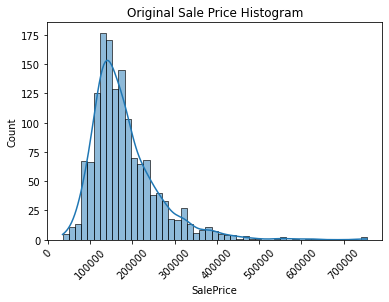

In [52]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation= 45)
sns.histplot(house_df['SalePrice'], kde= True)
plt.show()

<AxesSubplot:title={'center':'Log Transformed Sale Price Histogram'}, xlabel='SalePrice', ylabel='Count'>

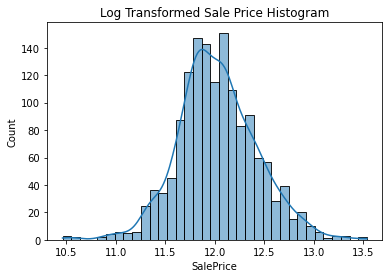

In [53]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice= np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)

In [54]:
# SalePrice를 로그 변환
original_SalePrice=house_df['SalePrice']
house_df['SalePrice']= np.log1p(house_df['SalePrice'])

In [55]:
# 불필요한 칼럼 삭제
house_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [56]:
# 드롭하지 않은 숫자형 null 칼럼은 평균 값으로 대체
house_df.fillna(house_df.mean(), inplace=True)

In [57]:
# null 값이 있는 피처명과 타입을 추출
null_column_count= house_df.isnull().sum()[house_df.isnull().sum() >0]
house_df.dtypes[null_column_count.index]

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

In [58]:
import pandas as pd
house_df.shape

(1460, 75)

In [59]:
print(pd.get_dummies(house_df).shape)
house_df_ohe= pd.get_dummies(house_df)

(1460, 271)


In [60]:
null_column_count= house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
house_df_ohe.dtypes[null_column_count.index]

Series([], dtype: object)

In [61]:
#RMSE측정
def get_rmse(model):
    pred= model.predict(X_test)
    mse= mean_squared_error(y_test, pred)
    rmse= np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE', np.round(rmse,3))
    return rmse

In [62]:
# 선형 회귀 모델 학습/예측/평가

In [63]:
def get_rmse(model):
    pred= model.predict(X_test)
    mse= mean_squared_error(y_test, pred)
    rmse= np.sqrt(mse)
    print(model.__class__.__name__, '로그 변환된 RMSE:', np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses=[]
    for model in models:
        rmse= get_rmse(model)
        rmses.append(rmse)
    return rmses

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target =house_df_ohe['SalePrice']
X_features= house_df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test= train_test_split(X_features, y_target, test_size=0.2, random_state=156)


lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg=Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg=Lasso()
lasso_reg.fit(X_train, y_train)

models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.132
Ridge 로그 변환된 RMSE: 0.128
Lasso 로그 변환된 RMSE: 0.176


[0.13189576579154197, 0.12750846334053034, 0.17628250556471406]